In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import stats  
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/run_simulations100000.csv')

In [3]:
# Check plot
df.head()

,simulation_no,home_score,away_score,total_score
0,0,14,15,29
1,1,19,24,43
2,2,14,17,31
3,3,17,16,33
4,4,21,8,29


In [4]:
num_simulations = df['total_score'].count()
mean_total_score = df['total_score'].mean()

Everything is loaded now, let's make the distribution of total score and fit it

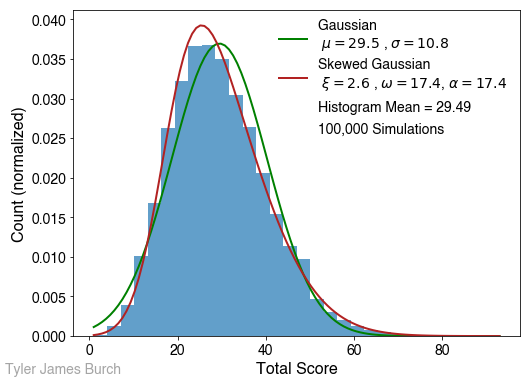

In [13]:
# Make histogram
fig = plt.figure(figsize=(8,6))
ax = plt.gca()
entries, bin_edges, patches = plt.hist(x=df['total_score'], bins=30, alpha=0.7, density=True)
plt.xlabel('Total Score', fontsize=16)
plt.ylabel('Count (normalized)', fontsize=16)
plt.title('')
ax.tick_params(axis='both', which='major', labelsize=14)


# Try to fit it. It looks either normal or poisson
xmin, xmax = df['total_score'].min(), df['total_score'].max()
x = np.linspace(xmin, xmax, 100)

#Normal
mean, std = stats.norm.fit(df['total_score'])
p = stats.norm.pdf(x, mean, std)
l = plt.plot(x, p, 'k', linewidth=2,
             label=('Gaussian \n $\mu={0:.1f}$ , $\sigma={1:.1f}$'.format(mean,std)), color='green')

# Skew Normalized
loc, scale, shape = stats.skewnorm.fit(df['total_score'])
p = stats.skewnorm.pdf(x, loc, scale, shape)
l =  plt.plot(x, p, 'k', linewidth=2, 
              label=('Skewed Gaussian\n $\\xi={0:.1f}$ , $\omega={1:.1f}$, $\\alpha={1:.1f}$'.format(loc, scale, shape)),
              color='firebrick')



# Some dummies to add to the legend for other info
s1 = 'Histogram Mean = %.2f'%mean_total_score
s2 = '{:,} Simulations'.format(num_simulations)
extra1 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0, label=s1)
extra2 = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0, label=s2)
handles, labels = ax.get_legend_handles_labels()
for obj, label in zip([extra1,extra2], [s1,s2]):
    handles.append(obj)
    labels.append(label)
    
plt.legend(handles=handles, labels=labels, loc='best',fontsize=14, frameon=False)
ax.grid(b=False)

# add watermark
plt.annotate(s="Tyler James Burch", xy=(.01,.033), xycoords='figure fraction',
                 textcoords='figure fraction', color='grey',alpha=0.7, fontsize=14)


plt.savefig('plots/scoring_histogram.png')